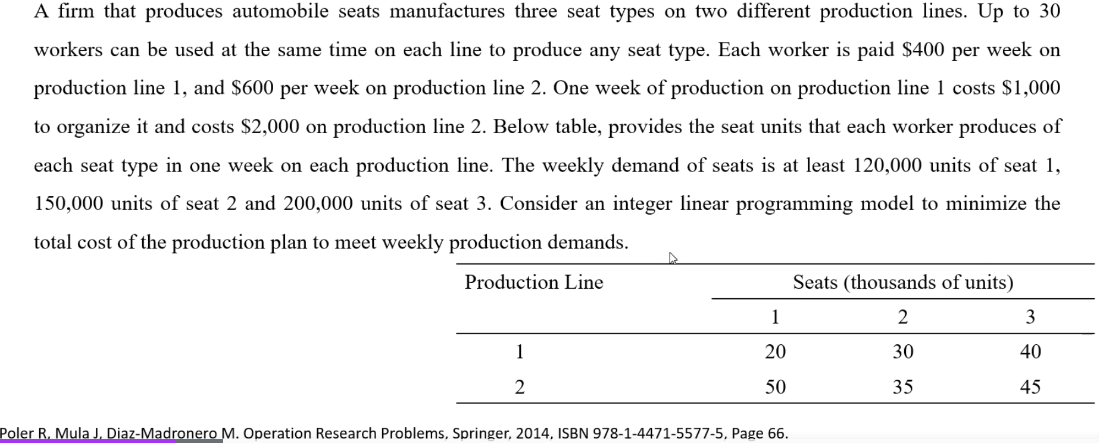

In [14]:
from pyomo.opt import SolverFactory
import pyomo.environ as pyo

In [15]:
model=pyo.ConcreteModel()

In [16]:
#define sets and parameters

#workers on each production line
model.i=pyo.Set(initialize=['PL1', 'PL2'])
#seat type
model.j=pyo.Set(initialize=['Type1', 'Type2', 'Type3'])

#parameters
model.S=pyo.Param(model.i, model.j, initialize=({('PL1','Type1'):20, ('PL1','Type2'):30, ('PL1','Type3'):40, ('PL2','Type1'):50, ('PL2','Type2'):35, ('PL2','Type3'):45}))
S=model.S

model.PC=pyo.Param(model.i, initialize={'PL1':1000, 'PL2':2000})
PC=model.PC

model.Sa=pyo.Param(model.i, initialize={'PL1':400, 'PL2':600})
Sa=model.Sa

In [17]:
#decision variables
model.x=pyo.Var(model.i, domain=pyo.NonNegativeIntegers)
x=model.x

model.y=pyo.Var(model.i, domain=pyo.Binary)
y=model.y

#objective function
def Objective_rule(model):
    return sum(PC[i]*y[i] for i in model.i)+sum(Sa[i]*x[i] for i in model.i)

model.Objf=pyo.Objective(rule=Objective_rule, sense=pyo.minimize)

#constraints

def constraint1(model, j):
    return sum(S[i,'Type1']*x[i] for i in model.i)>=120
model.const1=pyo.Constraint(model.i, rule=constraint1)

def constraint2(model, j):
    return sum(S[i,'Type2']*x[i] for i in model.i)>=150
model.const2=pyo.Constraint(model.i, rule=constraint2)

def constraint3(model, j):
    return sum(S[i,'Type3']*x[i] for i in model.i)>=200
model.const3=pyo.Constraint(model.i, rule=constraint3)

def constraint4(model, i):
    return x[i]<=30*y[i]
model.const4=pyo.Constraint(model.i, rule=constraint4)

In [19]:
Solver=SolverFactory('cplex_direct')
results=Solver.solve(model, tee=True)
print(results)
print('objective function: ', model.Objf())
for i in model.i:
    print(f'Number of workers on line {i}: ', x[i]())

Version identifier: 22.1.1.0 | 2023-06-15 | d64d5bd77
CPXPARAM_Read_DataCheck                          1
Found incumbent of value 3400.000000 after 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 3 rows and 0 columns.
MIP Presolve modified 6 coefficients.
Reduced MIP has 5 rows, 4 columns, and 10 nonzeros.
Reduced MIP has 2 binaries, 2 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.01 ticks)
Probing time = 0.00 sec. (0.00 ticks)
Tried aggregator 1 time.
MIP Presolve modified 2 coefficients.
Reduced MIP has 5 rows, 4 columns, and 10 nonzeros.
Reduced MIP has 2 binaries, 2 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.01 ticks)
Probing time = 0.00 sec. (0.00 ticks)
Clique table members: 1.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.01 ticks)

        Nodes                                   